# Neural Network Layer
- The fundamental building block of the most modern neural networks is a layer of neurons.
- Look at the demand prediction example where we hand 4 input features that were set to this layer of 3 neurons in the hidden layer that then sends its output to this output layer with just one neuron.
- The computation of layer 1 : 
    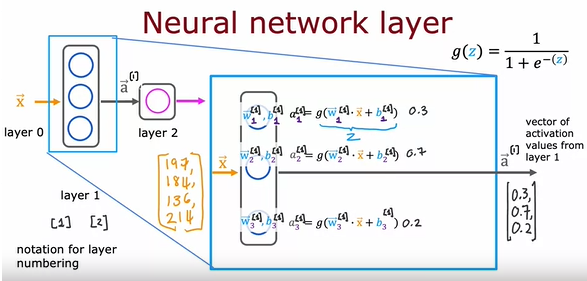
- The computatoion of layer 2 : 
    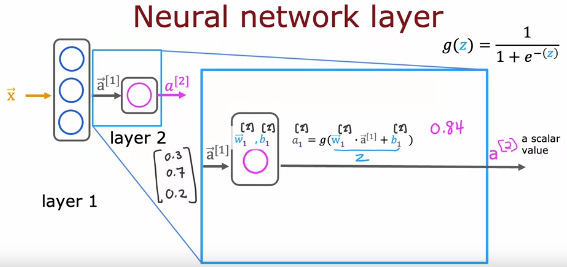
- 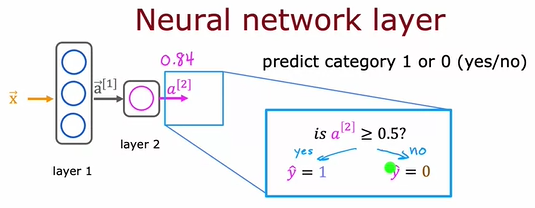
- Every layer inputs a vector of numbers and applies a bunch of logistic regression units to it, and then computes another vector of numbers that then gets passed form layer to layer until we get to the final output layers computatoons, which is the prediction of the neural network.

# More Complex Neural Networks
- This network has 4 layers, not including layer 0 (input layer)
- The computation of layer 3
    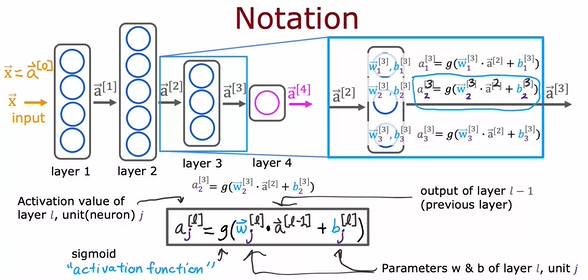
- With this notation, we now know how to compute the activation values of any layer in a neural networks as a functon of the parameters as well as the activations of the previous layer.

# Inference : Making predictions (forward propagation)
- 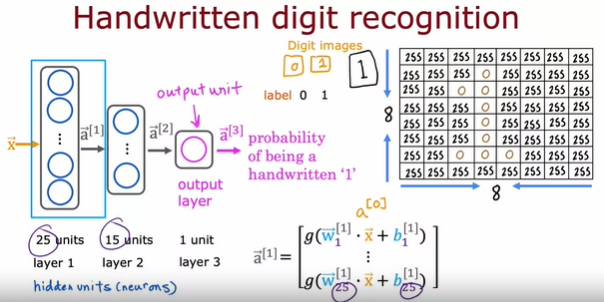
- 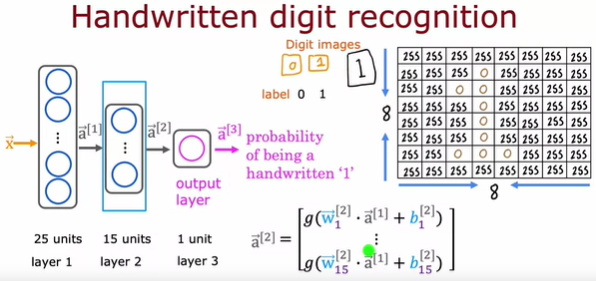
- 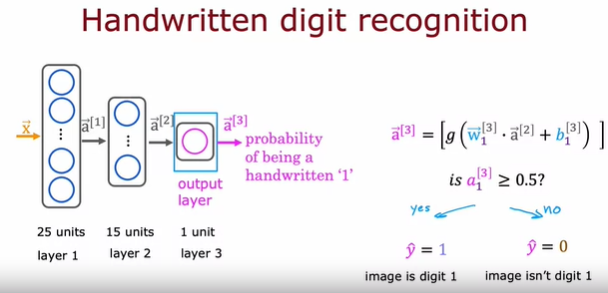
- Forward propagation because we're propagating the activations of the neurons. and the contrast to a different algorithm called backward propagation or back propagation, which is used for learning.
- This type of neural network architecture where we have more hidden units initally and then the number of hidden units decreases as we get closer to the output layer.

# OPTIONAL LAB - Neurons and Layers
- Will explore the inner working of neurons/units and layers. The regression/linear model and logistic model
    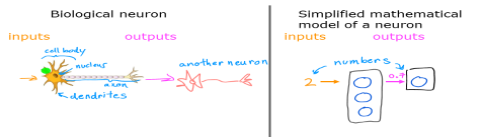
    
### Tensorflow and Keras
- Tensorflow is a machine learning package developed by google. In 2019, google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework that creates a simple, layer-centric interface to Tensorflow

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

### Neuron without activation - Regression/Linear Model

In [17]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

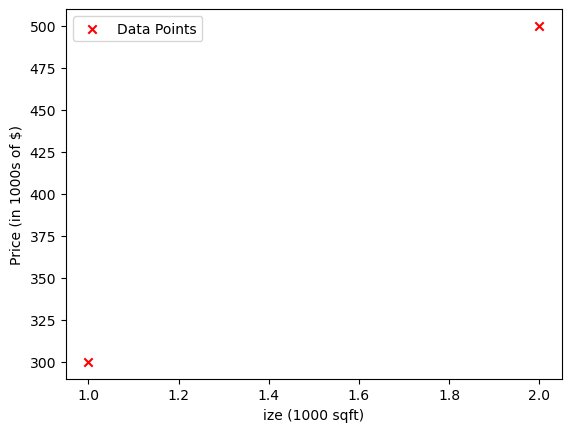

In [18]:
plt.scatter(X_train, Y_train, marker='x', c='r', label='Data Points')
plt.legend()
plt.ylabel('Price (in 1000s of $)')
plt.xlabel('ize (1000 sqft)')
plt.show()

### Regression/Linear Model
- The function implememted by a neuron with no activation is the same linear regression
    
- We can deine a layer with one neuron or unit and compare it to the familiar linear regression function

In [19]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear',)

In [20]:
linear_layer.get_weights()

[]

- There are no weights are not yet instantiated. Let's try the model on one example X_train. this will trigger the instantiation of the weights. The input to the layer must be 2-D, so we'll reshape it.

In [21]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[0.6935166]], shape=(1, 1), dtype=float32)


- The result is a tensor (another name for an array) with a shape of (1, 1) or one enrty.
- Now let's look ar the weights and bias. These weights are randomaly initalized to small numbers and the bias defaults to being intialized to zero.

In [22]:
w, b = linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[0.6935166]], b=[0.]


 - A linear regression model with a single input feature will have a single weight and bias
 - The weights are intialized to random values so let's see them to known values

In [23]:
set_w = np.array([[200]])
set_b = np.array([100])

# Set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [24]:
a1 = linear_layer(X_train[0].reshape(1, 1))
print(a1)
alin = np.dot(set_w, X_train[0].reshape(1, 1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [25]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w) + set_b

In [28]:
prediction_tf

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[300.],
       [500.]], dtype=float32)>

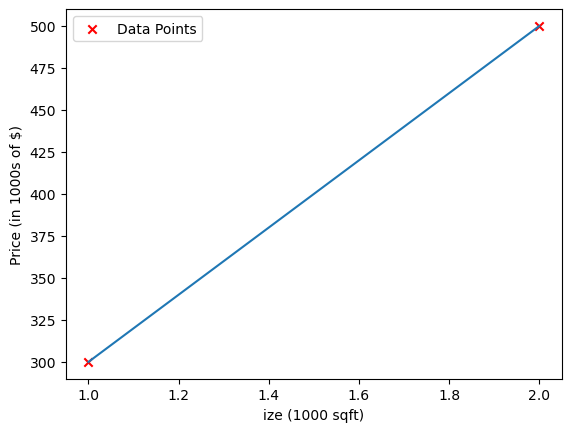

In [29]:
plt.scatter(X_train, Y_train, marker='x', c='r', label='Data Points')
plt.plot(X_train, prediction_tf)
plt.legend()
plt.ylabel('Price (in 1000s of $)')
plt.xlabel('ize (1000 sqft)')
plt.show()

## Neuron with Sigmoid activation
- The function implemented by a neuron/unit with a sigmoid activation is the same logistic regression
        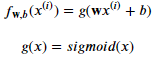

In [30]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

In [32]:
X_train[pos]

array([3., 4., 5.], dtype=float32)

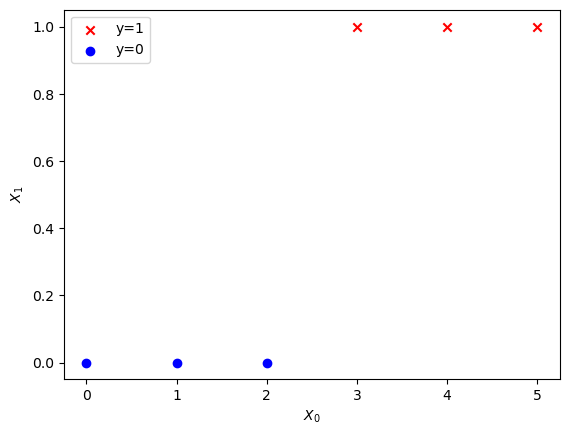

In [33]:
pos = Y_train == 1
neg = Y_train == 0

plt.scatter(X_train[pos], Y_train[pos], marker='x', c='red', label='y=1')
plt.scatter(X_train[neg], Y_train[neg], marker='o', c='blue', label='y=0')
plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.legend()
plt.show()

### Logistic Neuron
- We can implement a 'logistic neuron' by adding a sigmoid activation. 

In [36]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

- model.summary() show the layers and number of parameters in the model. There is only one layer in this model that layer has only one unit. the unit has 2 parameters w and b

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
logistic_layer = model.get_layer('L1')
w, b = logistic_layer.get_weights()
print(w, b)
print(w.shape, b.shape)

[[0.11096632]] [0.]
(1, 1) (1,)


In [40]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [42]:
a1 = model.predict(X_train[0].reshape(1, 1))
print(a1)
alog = sigmoid(np.dot(set_w, X_train[0].reshape(1, 1)) + set_b)
print(alog)

1/1 [==============================] - 0s 21ms/step
[[0.01098694]]
tf.Tensor([[0.01098694]], shape=(1, 1), dtype=float64)
